In [1]:
from __future__ import print_function
__author__= 'Sachin Verma'
import os

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
print (df.columns)

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [4]:
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [5]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [6]:
#print (df['ageM'])

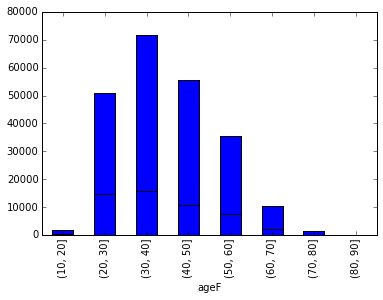

In [7]:
bins = np.arange(10, 99, 10) # create the ranges b/w 10 and 99 (starting with 10) with delta of 10

#print (bins)

categories_M = pd.cut(df['ageM'], bins, labels=None)
categories_F = pd.cut(df['ageF'], bins, labels=None)


#print(categories)

aggregated_Data_M = df.ageM.groupby(categories_M).agg(count_nonzero)
aggregated_Data_F = df.ageF.groupby(categories_F).agg(count_nonzero)


#aggregated_Data_M.head()
aggregated_Data_M.plot(kind='bar')
aggregated_Data_F.plot(kind='bar')



#df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
#df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


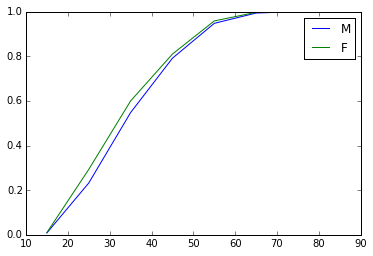

In [8]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [9]:
import scipy.stats

In [10]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.61519793242561782, pvalue=0.0)


In [11]:
#print (df.ageM)
#df.ageM[~np.isnan(df.ageM)]
#print (df.ageM)
#ps=scipy.stats.pearsonr(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
ps=scipy.stats.pearsonr(csM, csF)


print(ps)

(array([ 0.9983507]), array([  1.12021998e-08]))


In [12]:
sp=scipy.stats.spearmanr(df.ageM, df.ageF)
print(sp)

SpearmanrResult(correlation=-0.43552302983795976, pvalue=0.0)


In [13]:
df['date'] = pd.to_datetime(df['starttime'])

mytime = df['date']
#print (df['date'].head())

print (mytime[0].hour)

0


In [14]:
#date_bins = [6,18]
#df['dayT'] = df['starttime'][(df['date'].dt.hour > 6) & (df['date'].dt.hour < 18)]
#print(df['date'].dt.hour)
#print (df['dayT'].dt.hour())

#df_dayT = [1][(df['date'].dt.hour > 6) & (df['date'].dt.hour < 18)]
#df_nightT = 0[(df['date'].dt.hour > 18) | (df['date'].dt.hour < 6) ]


#print (df_dayT.describe())
#print (df_nightT.describe())

#print (df_dayT.dt.hour)
#print (df_nightT.dt.hour)


In [15]:
#print (mytime.dt.minute)
#print (mytime)

#((df['date'][df['gender']==2].groupby([df['date'].dt.weekday]).count())/norm_w).plot()
#df['date'][df['gender']==2].groupby([df['date'].dt.weekday]).count())/norm_w).plot(kind="bar", color='IndianRed', alpha=0.5)
#df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
#df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

In [16]:
#ks_time=scipy.stats.ks_2samp(df_dayT.dt.hour, df_nightT.dt.hour)
#print (ks_time)

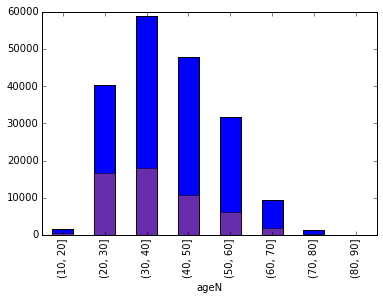

In [17]:
new_bins = np.arange(0, 24, 1) # create the ranges b/w 10 and 99 (starting with 10) with delta of 10




#-------------------------------------

#categories_M = pd.cut(df['ageM'], bins, labels=None)
#categories_F = pd.cut(df['ageF'], bins, labels=None)


#print(categories)

#aggregated_Data_M = df.ageM.groupby(categories_M).agg(count_nonzero)
#aggregated_Data_F = df.ageF.groupby(categories_F).agg(count_nonzero)


#aggregated_Data_M.head()
#aggregated_Data_M.plot(kind='bar')
#aggregated_Data_F.plot(kind='bar')



df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour > 6) & (df['date'].dt.hour < 18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour < 6) | (df['date'].dt.hour > 18))]

categories_D = pd.cut(df['ageD'], bins, labels=None)
categories_N = pd.cut(df['ageN'], bins, labels=None)

aggregated_Data_D = df.ageD.groupby(categories_D).agg(count_nonzero)
aggregated_Data_N = df.ageN.groupby(categories_N).agg(count_nonzero)


#aggregated_Data_M.head()
aggregated_Data_D.plot(kind='bar')
aggregated_Data_N.plot(kind='bar', color='IndianRed',alpha=0.5)




#categories_day = pd.cut(df_dayT, bins, labels=None)
#categories_night = pd.cut(df_nightT, bins, labels=None)


#print(categories)

#aggregated_Data_day = df_dayT.groupby(categories_day).agg(count_nonzero)
#aggregated_Data_night = df_nightT.groupby(categories_night).agg(count_nonzero)


#aggregated_Data_M.head()
#aggregated_Data_day.plot(kind='bar', alpha=0.5)
#aggregated_Data_night.plot(kind='bar',color='IndianRed', alpha=0.5)




          count_nonzero
ageD                   
(10, 20]       0.002008
(20, 30]       0.097329
(30, 40]       0.122006
(40, 50]       0.069262
(50, 60]       0.019372
(60, 70]       0.002915
(70, 80]       0.000021
(80, 90]       0.000000


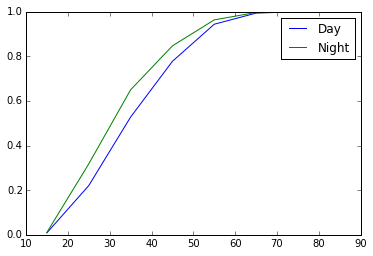

In [18]:
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

In [19]:
ks_dn=scipy.stats.ks_2samp(df.ageD, df.ageN)
print (ks_dn)

Ks_2sampResult(statistic=0.4813028800358603, pvalue=0.0)


In [20]:
ps=scipy.stats.pearsonr(csD, csN)
print(ps)

(array([ 0.9924768]), array([  1.05850646e-06]))


In [21]:
sp=scipy.stats.spearmanr(df.ageD, df.ageN)
print(sp)

SpearmanrResult(correlation=-0.36276094928837765, pvalue=0.0)
